<a href="https://colab.research.google.com/github/Tien84/Face-Detection/blob/master/demolstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy

In [ ]:
!pip install pandas

In [ ]:
!pip install keras

In [ ]:
!pip install matplotlib

In [ ]:
!pip install sklearn

In [ ]:
!pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/driver')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/content/driver/My Drive/LSTM_Model/AAPL.csv')
#data= data[::-1] 
data.index.freg='Date'
data

In [ ]:
data.head(), data.tail()

In [ ]:
open_price = data.iloc[:,1:2]
train_set = open_price[:1816].values
test_set = open_price[1816:].values
print("Train size: ",train_set.shape)
print("Test size:",test_set.shape)

In [ ]:
dates = pd.to_datetime(data['Date'])
plt.plot_date(dates,open_price,fmt='-')
plt.savefig("Bitcoin.jpg")

In [ ]:
len(data)

In [13]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [14]:
def get_data(train,test,time_step,num_predict,date):
  x_train= list()
  y_train = list()
  x_test = list()
  y_test = list()
  date_test= list()

  for i in range(0,len(train) - time_step - num_predict):
    x_train.append(train[i:i+time_step])
    y_train.append(train[i+time_step:i+time_step+num_predict])

  for i in range(0, len(test) - time_step - num_predict):
    x_test.append(test[i:i+time_step])
    y_test.append(test[i+time_step:i+time_step+num_predict])
    date_test.append(date[i+time_step:i+time_step+num_predict])
  
  return np.asarray(x_train), np.asarray(y_train), np.asarray(x_test), np.asarray(y_test), np.asarray(date_test)

In [15]:
from sklearn.preprocessing import MinMaxScaler
x_train, y_train, x_test, y_test, date_test = get_data(train_set,test_set,30,1, dates)

# dua ve 0->1 cho tap train
scaler = MinMaxScaler()
x_train = x_train.reshape(-1,30)
y_train = x_train.reshape(-1,1)

x_train = scaler.fit_transform(train_set)
y_train = scaler.fit_transform(train_set)

# dua ve 0->1 cho tap test
#x_test = x_test.reshape(-1,30)
x_test = x_test.reshape(-1)
y_test = y_test.reshape(-1,1)

x_test = scaler.fit_transform(test_set)
y_test = scaler.fit_transform(test_set)

date_test = date_test.reshape(-1,1)

In [26]:
from keras import Sequential
from keras.layers import LSTM
from keras.layers import Dropout,Dense
#dau vao 202 doan 1
n_input = 202
n_features = 1

model = Sequential()
model.add(LSTM(units=50,activation='relu', input_shape=(n_input, n_features), return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=50))
model.add(Dropout(0.3))
model.add(Dense(1))


In [27]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

In [ ]:
history=model.fit(x_train, y_train, epochs=20, validation_split=0.2, verbose=1, batch_size=30)
model.save('/content/driver/My Drive/LSTM_Model/lstm_test')

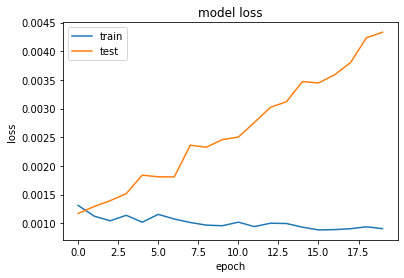

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc= 'upper left')
plt.show()

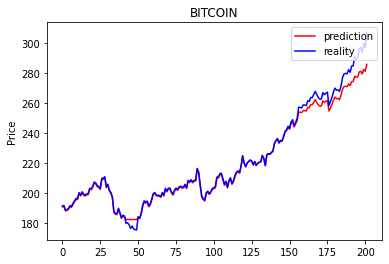

In [32]:
import matplotlib.pyplot as plt
import keras
model = keras.models.load_model('/content/driver/My Drive/LSTM_Model/lstm_test')

test_output = model.predict(x_test)

# print(test_output)
test_1 = scaler.inverse_transform(test_output)
test_2 = scaler.inverse_transform(y_test)
plt.plot(test_1[:202], color='r')
plt.plot(test_2[:202] ,color='b')
plt.title("BITCOIN")
#plt.xlabel("STT")
plt.ylabel("Price")
plt.legend(('prediction', 'reality'),loc='upper right')
plt.show()

In [ ]:
test_1 = scaler.inverse_transform(test_output)
test_2 = scaler.inverse_transform(y_test)
print(test_1)
print(test_2)

In [35]:
# Đánh giá mô hình
score = model.evaluate(x_test, y_test,verbose=1, batch_size = 30)
print('Test Score', score)

7/7 [==============================] - 0s 4ms/step - loss: 0.0011
Test Score 0.001083296025171876


In [39]:
from sklearn.metrics import mean_squared_error
from math import sqrt
predictions= model.predict(x_test) 
mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 0.032913
